# 第 3 章 线性回归模型的贝叶斯视角

<style>p{text-indent:2em;2}</style>

本章将介绍最流行、最有用的一种模型--线性模型。其本身就是非常有用的模型，也是许多其他模型的基础。如果你学过统计学课程，你可能听说过简单线性回归、多元线性回归、逻辑回归、方差分析、方差分析等。所有这些方法都是同一基本主题--线性回归模型的变体。在本章中，我们将介绍以下主题：

- `一元线性回归`
- `稳健的线性回归`
- `分层线性回归`
- `多项式线性回归`
- `多元线性回归`
- `交互作用`
- `变方差的线性回归`

---

## 3.1 高斯线性回归

实际应用中经常会遇到下面这类问题：我们有一个连续变量 $x$ ，希望对另外一个变量 $y$ 建模并进行预测。这些变量通常以 $\{(x_1,y_1),(x_2,y_2),...,(x_n,y_n)\}$ 成对方式出现。此类问题一般可通过线性回归建模，当只有一个自变量时，被称为一元线性回归模型。

在上述描述中，通常 $x$ 被称为自变量、预测变量或输入变量，而 $y$ 被称为因变量、结果变量或输出变量。在 `Numpy` 中，一元线性回归模型中的输入 $\mathbb{x}$ 和 输出 $\mathbb{y}$ 为一维数组。当存在多个自变量时，输入 $\mathbf{X}$ 为矩阵，此时的模型被称为多元线性回归模型。

使用线性模型的一些典型场景包括：

- 对多个因素之间的关系建模，如雨量、土壤盐度与农作物是否施肥等，然后回答：它们之间的关系是否线性？关系有多强？哪个因素影响最强？
- 找出全国平均巧克力摄入量与诺贝尔奖得主数量之间的关系。理解为什么这二者之间的关系可能是假的。
- 根据当地天气预报中的太阳辐射，预测家里的燃气账单。该预测的准确性如何？
  

### 3.1.1 与机器学习的联系

（1）机器学习与统计学

按照 `Kevin P. Murphy` 的说法，机器学习指一系列从数据中自动学习隐藏的规律、并用于预测未知数据，或在不确定状态中做出决策的方法的总称。机器学习与统计学相互交织，不过正如 `Kevin P. Murphy` 所说：“如果从概率视角来看，二者间的关系就比较清晰了”。尽管两个领域在概念和数学上紧密联系，但二者间不同的术语让这种联系显得不那么清晰了。因此，本文会介绍一些机器学习中的术语。

（2）回归是一种监督学习方法

用机器学习的术语来说，回归属于典型的`监督学习`。在机器学习框架中，学习从 $\mathbf{X}$ 到 $\mathbf{Y}$ 的一个映射就是`回归`问题（ $\mathbf{Y}$ 是连续变量）。不过，机器学习术语中通常用 `特征` 取代统计学中的 `变量`。而 `监督` 则指，已经知道 $\mathbf{X}-\mathbf{Y}$ 变量对的观测值，如何从中抽象出一种 `映射关系` 来处理未来的观测（即只知道 $\mathbf{X}$ 而不知道 $\mathbf{Y}$ 的情形）。

### 3.1.2 线性回归模型的核心

让我们开始学习如何构建线性模型。看下面该公式：

\begin{equation*}
y_i= \alpha + x_i \beta \tag{式3.2}
\end{equation*}

该等式描述了变量 $\mathbb{x}$ 与变量 $\mathbb{y}$ 之间的线性关系。其中，参数 $β$ 控制直线的斜率，可以理解为变量 $\mathbb{x}$ 的单位变化量所对应 $\mathbb{y}$ 的变化量。另外一个参数 $α$ 为截距，可以解释为当 $x_i=0$ 时, $y_i$ 的值，在图形上表示， $α$ 就是直线与 $y$ 轴交点的坐标。

计算线性模型参数的方法很多，最小二乘法是其中之一。每次使用软件去拟合直线时，底层可能用的就是最小二乘法。最小二乘法返回的 $α$ 和 $β$ 能够让观测到的 $y$ 与预测的 $\hat y$ 之间均方误差最小。其估计 $α$ 和 $β$ 本质是一个最优化问题，其目标是寻找使目标函数达到最值（最小值或最大值）时的参数解。

最优化并非求解线性模型的唯一方法，同样的问题可以从概率（贝叶斯）角度描述。`用概率方式思考的优势是：在得到最优参数解 $α$ 和 $β$ 的同时，还能够知道其不确定性程度。`与此相对的，最优化方法需要一些其他工作来提供不确定性信息。此外，贝叶斯方法还具备很大灵活性，尤其在使用 `PyMC3` 等工具时，可将模型应用到本章后面所介绍的各种特定问题中。

从概率角度，线性回归模型可以表示成如下形式：

\begin{equation*}
\mathbb{y} \sim \mathcal{N} ( \mu = \alpha + \mathbb{x} \beta , \epsilon ) \tag{式3.2}
\end{equation*}

也就是说，假设 $\mathbb{y}$ 是一个服从均值为 $α + \mathbb{x} β$ 、标准差为 $\epsilon$ 的正态分布的随机变量。其中 $α$ 、 $β$ 、 $\epsilon$ 为未知的模型参数（贝叶斯方法中视其为随机变量，具有自身概率分布），需要设置先验。

先验的设置根据问题上下文和数据分析师的经验给出，例如，下面是假设参数服从正态分布的一组先验设置：

\begin{align*}
\alpha &\sim \mathcal{N}\left(\mu_{\alpha}, \sigma_{\alpha}\right) \tag{式3.3}\\ 
\beta &\sim \mathcal{N}\left(\mu_{\beta}, \sigma_{\beta}\right)\\ 
\epsilon &\sim\left|N\left(0, \sigma_{\epsilon}\right)\right|  
\end{align*} 

其中：

（1）截距参数 $α$ 的先验，根据问题不同会有较大变化，可使用一个平坦的高斯分布（标注差 $\sigma_\alpha$ 相对于数据的值域较大）。

（2）斜率参数 $\beta$ 可能比截距更容易获得先验，因为许多问题中至少可以预先知道斜率的正负符号；例如，预期权重值 $\beta$ 平均会随着高度变化而增加。

（3）误差参数 $\epsilon$ 应大于 0，采用半高斯分布是一个选择。当对误差范围不可预期时，可以将 $\sigma_\epsilon$ 设置为相对 $\mathbb{y}$ 较大的值，如设置为 $\sigma_{\mathbb{y}}$ 的 10 倍，以保留足够空间通过数据似然来驱动不确定性的收缩。

上述模糊的先验设置可保证先验对后验影响不至于过大，并较容易被数据克服，使最终结果更倾向于数据证据。

```{tip}
（1） 原理上，随着数据证据的逐步增加，先验将逐渐被数据似然所克服，或者说，无论先验如何设置，理论上在经过充分的数据证据后，后验将收缩至相同的结果。
（2）使用最大似然法（最小二乘）得到的参数解与采用平坦高斯先验的贝叶斯最大后验估计（MAP）得到的解都是对参数的点估计，两者的结果一致。
```

误差参数 $\epsilon$ 设置的半高斯先验，也可以由均匀分布或半柯西分布来代替。半柯西分布是一个很好的正则化先验，而均匀分布由于存在硬边界的限制，可能不是最好的选择。如果想对 $\epsilon$ 的标准差施加某个特定值附近的强先验，也可以为 $\epsilon$ 设置伽马先验。不同软件包中伽马分布的默认参数化方法可能有点不一样，不过`PyMC3`允许使用形状（ shape ）和速率（ rate ）、或者平均值（ mean ）和标准差（ $\sigma$ ）来定义它。

要查看伽马和其他分布的形状，可以查看 `PyMC3` 文档：https://docs.pymc.io/api/distributions/continuous.html。

回过头再看线性回归模型，借助 Kruschke 图有 `图 3.1` 。在上一章的  `Kruschke 图` 中，我们规定使用符号 `=` 来定义确定性变量（如 $\mu$ ），使用 `∼` 来定义随机变量，如 $\alpha$ 、 $\beta$ 和 $\epsilon$ ：

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505092353_aa.webp" style="zoom:50%;" />

图3.1
</center>

定义好该模型，需要为其提供数据。这里采用人工合成的数据集（合成数据集的优点是：可事前知道参数的真值，进而方便检查是否能够使用模型恢复它们）：

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

az.style.use('arviz-darkgrid')

/tmp/ipykernel_2138/4172630698.py:18: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


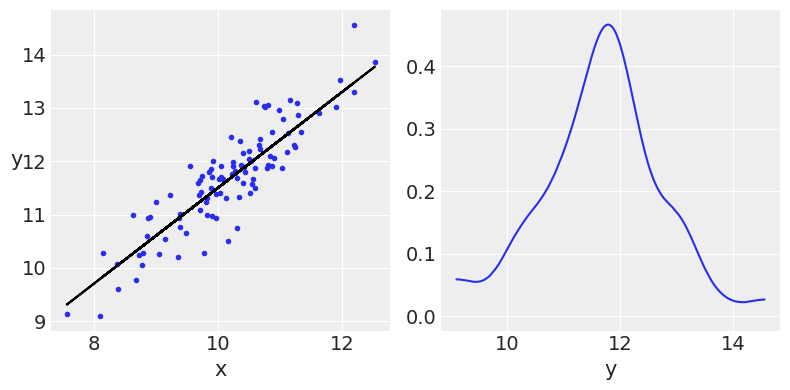

In [2]:
# 生成实验数据
np.random.seed(1)
N=100
alpha_real=2.5
beta_real=0.9
eps_real=np.random.normal(0,0.5,size=N)
x=np.random.normal(10,1,N)
y_real=alpha_real+beta_real*x
y=y_real+eps_real

_,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].plot(x,y,'C0.')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y',rotation=0)
ax[0].plot(x,y_real,'k')
az.plot_kde(y,ax=ax[1])
ax[1].set_xlabel('y')
plt.tight_layout()

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505092831_15.webp" style="zoom:67%;"/>

图3.2
</center>

现在使用 `PyMC3` 来构建和拟合模型。注意这里 $\mu$ 在模型中通过 `pm.deterministic` 来定义，表示它是`确定性变量`，反映了数学表达式和 Kruschke 图的内容。在`PyMC3`中，如果显式定义了一个确定性变量，则会计算该变量并保存其迹：

In [3]:
with pm.Model() as model_g:
    # 定义模型参数的先验
    α = pm.Normal('α', mu = 0, sd = 10)
    β = pm.Normal('β', mu = 0, sd = 1)
    ϵ = pm.HalfCauchy('ϵ', 5)

    # 定义映射 (y = α + β * x) 和似然 P(y|α,β,ε）
    μ=pm.Deterministic('μ', α + β * x)
    y_pred=pm.Normal('y_pred',mu = μ, sd = ϵ, observed = y)

    # 近似推断：随机采样生成模型中所有随机变量（模型参数或隐变量等）和显式确定性变量的迹
    trace_g = pm.sample(2000, tune = 1000)

/tmp/ipykernel_2138/162259929.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_g = pm.sample(2000, tune = 1000)
Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


KeyboardInterrupt: 

如果不在模型中显式地定义确定性变量。则 `PCMC3` 仍会计算该变量，但不会将保存其迹。例如，可编写以下代码：

In [ ]:
y_pred = pm.Normal('y_pred', mu = α + β*x, sd = ϵ, observed = y)

为探索推断结果，可以绘制未知随机变量的迹图（`图 3.3`），此处省略了确定性变量 $\mu$ 。你可以通过将变量名称（随机变量或显式确定性变量）以列表形式传递给参数 `var_names` 的方式，来实现多变量迹图的绘制。许多 `ArviZ` 函数都有一个 `var_names` 参数，你可以尝试其他 `ArviZ` 的绘图函数来探索后验。

In [ ]:
az.plot_trace(trace_g, var_names = ['α','β','ϵ'])

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505093554_e3.webp)

图3.3
</center>

下一节将讨论线性模型的性质，以及其如何影响采样过程和模型的解释，并介绍几种解释和可视化后验的方法。

### 3.1.3 线性模型与高自相关性问题

前面模型中， $α$ 和 $β$ 间实际上存在比较严重的相关性问题。这意味着采样结果会很差，有效采样很少。为什么呢？

其实我们被自己的假设误导了。

事实上，上述模型中，不论用哪条直线去拟合数据，该直线都会穿过 $\mathbb{x}$ 和 $\mathbb{y}$ 的均值点。拟合直线的过程相当于将直线固定在均值点上做旋转，其结果是呈现出`斜率越大截距越小`的相关性。如果将后验画出来的话可以很清楚地看到这点（见`图 3.4` , 暂时忽略 $ε$ ）。

In [ ]:
az.plot_pair(trace_g, var_names = ['α', 'β'], plot_kwargs = {'alpha': 0.1})

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510120946ab.webp)

图 3.4
</center>

可以看到，后验呈斜对角形状，这对于类似 `Metropolis-Hastings` 的采样器会产生问题（详细解释见`第 8 章`），而且参数维度越高，这种情况越严重。

在继续深入前，需澄清一点：前面提到的`拟合直线穿过均值点的现象`只在最小二乘法假设下成立。使用贝叶斯方法后，这个限制会被放松。后面的例子中可以看到，贝叶斯方法中，拟合直线会在均值点附近而不是正好穿过均值。但总体上，随机变量之间的自相关性与直线固定在某一点附近的假设仍然成立。

接下来从两个方面理解和解决高自相关性问题：
#### （1）解决方法 1：运行之前做中心化或归一化处理

解决问题的一个简单办法是先将 $\mathbb{x}$ 中心化，也就是说，对于每个点 $x_i$ ，减去 $\mathbb{x}$ 的均值。这样做的结果是 $x'$ 的中心在 0 附近，从而在修改斜率时，旋转点与截距点重合，参数空间也会变得不那么自相关。该方法在机器学习以及深度学习中经常被使用。

\begin{equation*} 
x'=x-\bar x \tag{式3.4}
\end{equation*} 

中心化不仅是一种计算技巧，同时有利于解释数据。截距是指当 $x_i=0$ 时 $y_i$ 的值，对许多问题而言，截距并没有什么实际意义。例如，对于身高或者体重的关系模型，当值为 0 时没有实际意义，因而截距对理解数据就没有帮助；对于另外一些问题，估计出截距可能很有用，因为在实验中可能无法测量出 $x_i = 0$ 的情况，此时截距的估计值能够提供有价值的信息。但不管怎么说，外推都有其局限性，应当谨慎使用！

根据问题和受众不同，可能需要汇报中心化之前和之后的参数估计值。如果需要汇报的是中心化之前的参数，那么可以像下面这样将参数转换成原来的尺度：

\begin{equation*}
\alpha=\alpha^{\prime}-\beta^{\prime} \bar{x} \tag{式3.5} \label{式3.5}
\end{equation*}

上面的公式可以通过以下公式推导出来：

\begin{align*} \tag{式3.6}  \label{式3.6}
y &= \alpha^{\prime}+\beta^{\prime} x^{\prime}+\epsilon  \\
y &= \alpha^{\prime}+\beta^{\prime}(x-\bar{x})+\epsilon  \\
y &= \alpha^{\prime}-\beta^{\prime} \bar{x}+\beta^{\prime} x+\epsilon 
\end{align*}  

然后可以得出：

\begin{equation*}
\beta = \beta' \tag{式3.7}  \label{式3.7}
\end{equation*}

进一步，在运行模型之前可以对数据进行`归一化处理`。归一化在统计学和机器学习中是常见的数据处理手段，许多算法对归一化后的数据效果更好。归一化过程在中心化基础上再除以标准差，其数学形式如下：

\begin{align*} \tag{式3.8} \label{式3.8}
x^{\prime} &= \frac{x-\bar{x}}{x_{s d}} \\
y^{\prime} &= \frac{y-\bar{y}}{y_{s d}} 
\end{align*}  


归一化的好处是能够对数据使用相同的弱先验，而不必关心数据值域大小（因为已经对数据做了尺度变换）。归一化后的数据，截距通常在 0 附近，斜率在 $-1～1$ 附近。

归一化后的数据可以使用 `标准分（z-score）` 来描述参数。如果某人称一个参数的 `z-score` 为 1.3，那么我们就知道该值在归一化前位于均值附近 1.3 倍标准差处。`z-score` 每变化一个单位，对应原始数据中变化 1 倍标准差。这点在分析多变量时很有用，因为所有参数都在同一个尺度上，进而简化了对数据的解释。

#### （2）解决办法 2：更换采样方法

另外一种解决高自相关性的办法是使用不同采样方法。`NUTS` 算法与 `Metropolis` 算法相比，在类似受限的对角空间中遇到的困难小一些。原因是 `NUTS` 是根据后验曲率来移动的，因而更容易沿着对角空间移动。`NUTS` 算法每走一步都要比 `Metropolis` 算法更慢，但得到一个合理后验近似值所需步数更少（相关解释见`第 8 章`）。

### 3.1.4 对后验进行解释和可视化

正如已经看到的，可以使用 `ArviZ` 函数（如 `plot_trace` 和 `summary` ）探索后验，也可以使用自己的函数。对于线性回归，绘制出符合数据均值的直线，并标示参数 $\alpha$ 和 $\beta$ 的均值可能很有用。对于感兴趣的不确定性程度，则可以从后验中采样并以半透明线条形式绘制在均值直线周边（`图 3.5`）。

In [ ]:
plt.plot(x, y, 'C0.')
alpha_m = trace_g['α'].mean()
beta_m = trace_g['β'].mean()
draws = range(0, len(trace_g['α']), 10)

# 绘制不确定性集合
plt.plot(x, trace_g['α'][draws] + trace_g['β'][draws] * x[:, np.newaxis], c='gray', alpha=0.5)
# 绘制均值直线
plt.plot(x, alpha_m + beta_m * x, c='k', label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051012370861.webp" />

图3.5
</center>

可以看到，上图中间部分比较确定（即不确定性程度低），不过直线并没有都相交于一点（贝叶斯方法并不强制所有直线都穿过均值点）。

半透明直线是一种比较直观的表示方法，不过还可以给该图增加更酷的东西：用半透明区间来描述 $μ$ 的最大后验密度（ `HPD` ）区间（`图 3.6 `）。注意这也是在模型中将变量 $μ$ 显式定义为确定性变量的主要原因，简化以下代码：

In [ ]:
# 绘制均值直线
plt.plot(x, alpha_m + beta_m * x, c = 'k', 
        label = f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

# 绘制参数的不确定性程度区间（0.98）
sig = az.plot_hpd(x, trace_g['μ'], credible_interval=0.98, color='k')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051012334888.webp" />

图3.6
</center>

另外一种方式是绘制因变量值 $\hat y$ 的 `HPD`（例如 94%和 50%）区间（见`图 3.7`），用于显示模型预测中 94% 和 50%的数据分布范围。在图中将 `50% HPD 区间` 用深灰色区域表示，将 `94% HPD` 区间用浅灰色表示。

利用 `PyMC3` 中的 `sample_posterior_predictive` 函数可以很容易得到预测值的采样。

In [ ]:
ppc = pm.sample_posterior_predictive(trace_g, samples = 2000, model=model_g)

然后我们可以画出结果：

In [ ]:
plt.plot(x, y, 'b.')

# 绘制均值直线
plt.plot(x, alpha_m + beta_m * x, c='k',
         label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

# 绘制因变量的不确定性区间（指定的 0.5 和默认的 0.94）         
az.plot_hpd(x, ppc['y_pred'], credible_interval=0.5, color='gray')
az.plot_hpd(x, ppc['y_pred'], color='lightgray')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051012410596.webp" style="zoom:67%;" />

图3.7
</center>

函数 `az.plot_hpd` 是一个辅助函数，可以使用它来绘制线性回归的 HPD 间隔。默认情况下，此功能会平滑间隔，可尝试传递参数 `smooth=false` 取消默认值。

### 3.1.5 皮尔逊相关系数

有时我们希望衡量两个变量之间的（线性）依赖关系。度量两个变量间线性相关性最常见的指标是`皮尔逊相关系数（Pearson correlation coefficient）` ，通常用小写的 $r$ 表示。如果 $r$ 值为 $+1$ ，我们称两个变量完全正相关，即一个变量随另一个变量的增加而增加；如果 $r$ 值为 $-1$ ，则称完全负相关，即一个变量随另一变量的增加而减少；当 $r$ 为 0 时，称两个变量间没有线性相关性。

皮尔逊相关系数并不涉及非线性相关性。人们很容易将皮尔逊相关系数与线性回归中的斜率弄混淆，但查看 [此链接](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg) 就可以明白，二者本质上是两个完全不同的量。

下面的公式可以在某种程度上减轻你的疑惑：

\begin{equation*}
r=\beta \frac{\sigma_{x}}{\sigma_{y}} \tag{式3.9} \label{式3.9}
\end{equation*}

只有在 $\mathbb{x}$ 和 $\mathbb{y}$ 的标准差相等时，皮尔逊相关系数才与斜率相等。也就是说，皮尔逊相关系数和斜率的主要区别在于是否受数据尺度影响。在对数据做归一化处理消除尺度影响后，两者之间确实等价，但在未做归一化处理前，两者并不等价。需要注意：

- 皮尔逊相关系数衡量的是两个变量之间的相关性程度，其值位于 [-1,1] 区间内，`皮尔逊相关系数与数据尺度无关`；
- 斜率 $\beta$ 表示 $\mathbb{x}$ 变化一个单位时 $\mathbb{y}$ 的变化量，可以取任意实数。

根据统计学知识，皮尔逊相关系数与一个被称为 `决定系数（或可决系数）` 的量有关。决定系数记为 $r^2$ 或 $R^2$ ，发音为 “ $r$ 平方”。决定系数反映了`因变量的全部变异中，能够通过回归关系被自变量解释的比例（即认为测量值反映的变异中，有一部分可以用模型来解释，而剩下的部分模型无法解释）`，数学上被定义为因变量 $\mathbb{y}$ 的预测值方差除以测量值方差。该系数越大，表明 $\mathbb{y}$ 与  $\mathbb{x}$ 间的回归关系确定性越高。如果回归关系被建模为线性回归关系，则该系数越大，就表明 $\mathbb{y}$ 与  $\mathbb{x}$ 间存在强线性相关性。

```{note}
注： 皮尔逊相关系数反映了两个变量之间的线性相关程度，而决定系数则反映了模型的确定性程度或可解释程度。因此，如果一个线性回归模型的决定系数非常高，则表明因变量和自变量之间的线性关系能够比较好地解释数据，两者之间的皮尔逊相关系数也应该越大。但对于非线性回归模型，决定系数和皮尔逊相关系数之间不一定存在这种映射关系。
```
需要注意的是：在贝叶斯线性回归模型中，预测值方差可能大于测量值方差，进而导致 $R^2$ 大于 1，不利于解释。因此，通常对 $R^2$ 做如下定义：

\begin{equation*}
R^{2} = \frac{\mathbf{V}_{n=1}^{N} \mathbf{E}\left[\hat{y}^{s}\right]}{\mathbf{V}_{n=1}^{N} \mathbf{E}\left[\hat{y}^{s}\right]+\mathbf{V}_{n=1}^{S}\left(\hat{y}^{s}-y\right)} \tag{式3.10}  \label{式3.10}
\end{equation*}

上式中，$E[\hat y^S]$ 是后验样本 $S$ 上，预测值 $\hat y$ 的平均值。

上式用 `预测值的方差` 除以 `预测值的方差加残差（预测值与真实值之间的残差）` 来确保 $R^2$ 被限制在区间 [0，1] 内。

在 `PYMC3` 中计算 $R^2$ 最简单的方法是使用 `ArviZ` 的 `r2_core()` 函数。其输入为观测值 $\mathbb{y}$ 和预测值 $\hat y$ 。其中， $\hat y$ 可利用 `sample_posterior_predictive` 函数轻松获得：

In [ ]:
az.r2_score(y, ppc['y_pred'])

默认情况下，此函数将返回 $R^2$ （本例为 0.8） 和标准差 （0.03）。

### 3.1.6 多元高斯分布的皮尔逊相关系数

计算皮尔逊相关系数的另一种方法是估计多变量高斯分布的协方差矩阵。多元高斯分布是高斯分布在一维以上的推广。以二维为例，要完全描述一个二元高斯分布，需要两个均值（或一个具有两个元素的向量），每个高斯分布对应一个，还需要一个 $2 x 2$ 的协方差矩阵，如下所示：

\begin{equation*}
\Sigma=\left[\begin{array}{cc}\sigma_{\mathbb{x}_{1}}^{2} & \rho \sigma_{\mathbb{x}_{1}} \sigma_{\mathbb{x}_{2}} \\ \rho \sigma_{\mathbb{x}_{1}} \sigma_{\mathbb{x}_{2}} & \sigma_{\mathbb{x}_{2}}^{2}\end{array}\right]    \tag{式3.11}  \label{式3.11}
\end{equation*}


这里 $\Sigma$ 为希腊大写的希格玛字母，表示协方差矩阵。主对角线上为每个变量的自方差，用该变量的标准差的平方 $\sigma_{\mathbb{x}_1}、\sigma_{\mathbb{x}_2}$ 来表示。矩阵中其余元素是变量之间的协方差，用单个标准差和变量间的皮尔逊相关系数 $\rho$ 表示。请注意，这里只有一个 $\rho$ ，因为只有两个维度。对于三个变量，则应有三个皮尔逊相关系数。

下面的代码为双变量高斯分布生成等值线图，均值固定在 $(0，0)$ 点。其中一个标准差是固定的，另一个标准差采用值 1 或 2 以及皮尔逊相关系数 $\rho$ 的不同值：

In [ ]:
sigma_x1 = 1
sigmas_x2 = [1, 2]
rhos = [-0.90, -0.5, 0, 0.5, 0.90]
k, l = np.mgrid[-5:5:.1, -5:5:.1]
pos = np.empty(k.shape + (2,))
pos[:, :, 0] = k
pos[:, :, 1] = l
f, ax = plt.subplots(len(sigmas_x2), len(rhos),
                     sharex=True, sharey=True, figsize=(12, 6),
                     constrained_layout=True)
for i in range(2):
    for j in range(5):
        sigma_x2 = sigmas_x2[i]
        rho = rhos[j]
        cov = [[sigma_x1**2, sigma_x1*sigma_x2*rho],
               [sigma_x1*sigma_x2*rho, sigma_x2**2]]
        rv = stats.multivariate_normal([0, 0], cov)
        ax[i, j].contour(k, l, rv.pdf(pos))
        ax[i, j].set_xlim(-8, 8)
        ax[i, j].set_ylim(-8, 8)
        ax[i, j].set_yticks([-5, 0, 5])
        ax[i, j].plot(0, 0,
                      label=f'$\\sigma_{{x2}}$ = {sigma_x2:3.2f}\n$\\rho$ = {rho:3.2f}', alpha=0)
        ax[i, j].legend()
f.text(0.5, -0.05, 'x_1', ha='center', fontsize=18)
f.text(-0.05, 0.5, 'x_2', va='center', fontsize=18, rotation=0)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510131210a9.webp)

图3.8
</center>

多元高斯分布假设下，可通过样本估计变量之间的协方差等参数。贝叶斯统计方法中可以考虑为协方差矩阵设置先验，常用三种方法：

- 一是使用 `Wishart 分布`直接为协方差矩阵设置先验。`Wishart 分布`可被认为是伽马分布或者 $\chi^2$ 分布的高维推广。
- 二是使用 [`LKJ`](https://docs.pymc.io/notebooks/LKJ.html) 为相关矩阵（注意不是协方差矩阵）设置先验。
- 三是为协方差矩阵中的模型参数 $\sigma_{\mathbb{x}_1}$ 、$\sigma_{\mathbb{x}_2}$ 和 $\rho$ 分别设置先验。

此处探索第三种方法，然后使用这些参数手动构建协方差矩阵：

In [ ]:
data = np.stack((x, y)).T
with pm.Model() as pearson_model:
    μ = pm.Normal('μ', mu=data.mean(0), sd=10, shape=2)
    σ_1 = pm.HalfNormal('σ_1', 10)
    σ_2 = pm.HalfNormal('σ_2', 10)
    ρ = pm.Uniform('ρ', -1., 1.)
    r2 = pm.Deterministic('r2', ρ**2)
    cov = pm.math.stack(([σ_1**2, σ_1*σ_2*ρ],
				    [σ_1*σ_2*ρ, σ_2**2]))
    y_pred = pm.MvNormal('y_pred', mu=μ, cov=cov, 
    				observed=data)
    trace_p = pm.sample(1000)

此处仅绘制 $R^2$ 的迹图：

In [ ]:
az.plot_trace(trace_p, var_names=['r2'])

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051013133311.webp)

图3.9
</center>

可以看到，$r^2$ 值的分布与上一个示例中使用 `ArviZ` 的 `r2_core` 函数获得的值基本相同。通过摘要可以更简单地进行比较。

In [ ]:
az.summary(trace_p, var_names=['r2'])

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510131427f7.webp)

</center>


## 3.2 更稳健的线性回归

在许多情况下，假设数据服从高斯分布是合理的。但需要注意的是：假设数据符合高斯特性，并不是说数据真的就符合高斯分布，而是说高斯分布对于问题而言是一个合理的、可接受的近似。有时高斯假设并不成立，例如当数据中存在异常值时，利用学生 $t$ 分布可以更有效地解决该问题，从而得到更稳健的推断。类似思想同样可以用于线性回归问题。

为了验证学生 $t$ 分布确实能增加线性回归的稳健性，这里使用[`Anscombe quartet`](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)数据集中的第 3 组数据。下面代码用 `Pandas` 读取数据，并对数据做中心化处理，以使采样器更容易收敛。

In [ ]:
ans = pd.read_csv('../data/anscombe.csv')
x_3 = ans[ans.group == 'III']['x'].values
y_3 = ans[ans.group == 'III']['y'].values
x_3 = x_3 - x_3.mean()

先来看看该数据集长什么样：

In [ ]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
ax[0].plot(x_3, (alpha_c + beta_c * x_3), 'k',
           label=f'y ={alpha_c:.2f} + {beta_c:.2f} * x')
ax[0].plot(x_3, y_3, 'C0o')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y', rotation=0)
ax[0].legend(loc=0)
az.plot_kde(y_3, ax=ax[1], rug=True)
ax[1].set_xlabel('y')
ax[1].set_yticks([])
plt.tight_layout()

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510133712af.webp)

图3.10
</center>

现在用 $t$ 分布替换模型中的高斯分布，该改变需要引入正态参数 $\nu$ ，有关该参数的含义，可参照`第 2 章`的内容。

在下面的模型中，使用平移的指数分布来避免接近零的 $\nu$ 值。非平移的指数分布给接近零的值赋予过高权重。这对没有异常值的数据来说很好，但对有极端异常值的数据（比如 `Anscombe` 的第三个数据集）最好避免这么低的值。当然，默认设置是很好的起点，但没必要拘泥于它。其他常见的先验还包括 $\Gamma(2，0.1)$ 或 $\Gamma(\mu=20，SD=15)$ 等。

In [ ]:
with pm.Model() as model_t:
    α = pm.Normal('α', mu=y_3.mean(), sd=1)
    β = pm.Normal('β', mu=0, sd=1)
    ϵ = pm.HalfNormal('ϵ', 5)
    ν_ = pm.Exponential('ν_', 1/29)
    ν = pm.Deterministic('ν', ν_ + 1)
    y_pred = pm.StudentT('y_pred', mu=α + β * x_3,
                         sd=ϵ, nu=ν, observed=y_3)
    trace_t = pm.sample(2000)

在下图中，可以看到根据 `model_t` 的稳健拟合和根据 `SciPy` 线性回归的非稳健拟合（采用最小二乘回归）。作为额外练习，你可以尝试添加使用 `model_g` 获得的最佳直线：

In [ ]:
beta_c, alpha_c = stats.linregress(x_3, y_3)[:2]
plt.plot(x_3, (alpha_c + beta_c * x_3), 'k', label='non-robust', alpha=0.5)
plt.plot(x_3, y_3, 'C0o')
alpha_m = trace_t['α'].mean()
beta_m = trace_t['β'].mean()
plt.plot(x_3, alpha_m + beta_m * x_3, c='k', label='robust')
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend(loc=2)
plt.tight_layout()

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510134431b0.webp)

图3.11
</center>

当非稳健拟合试图折衷并包含所有点时，稳健的贝叶斯模型 `model_t` 会自动丢弃一个点，并拟合一条恰好通过所有剩余点的直线。这是一个非常奇特的数据集，但该信息仍然适用于更真实、更复杂的其他数据集。由于学生 $t$ 分布是重尾分布，所以可以给远离大量数据的点以较小权重。

在继续前，花一点时间来考虑模型参数的值：

In [ ]:
az.summary(trace_t, var_names=varnames)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051013485414.webp)

</center>

如表所示，$\alpha$ 、 $\beta$ 和 $\epsilon$ 的值定义非常狭窄，其中对于基本上为 0 的 $\epsilon$ 值更是如此。这是完全合理的，因为我们正在将一条线拟合到一组完全对齐的点上（如果忽略异常值）。

运行后验预测性检查，以探索模型捕获数据的能力：

In [ ]:
ppc = pm.sample_posterior_predictive(trace_t, samples=200, model=model_t,random_seed=2)
data_ppc = az.from_PyMC3(trace=trace_t, posterior_predictive=ppc)
ax = az.plot_ppc(data_ppc, figsize=(12, 6), mean=True)
plt.xlim(0, 12)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051013515477.webp)

图3.12
</center>

如图所示，大部分数据得到了非常好的匹配。需要注意的是：此模型的预测值不仅大于整体值，而且位于其两边。就当前目的而言，此模型运行良好，不需要进一步更改。不过对于其他问题，可能希望预测值大于整体值，此时应返回并更改模型。

## 3.3 分层线性回归

上一章学习了分层模型的基础知识，现在可以将其应用到线性回归，在分组层次和高于分组的层次建模并估计。与之前相同，这里引入 `超先验`。

首先创建 8 个相关的数据组，其中有一组仅包含一个数据点。

In [ ]:
N = 20
M = 8
idx = np.repeat(range(M-1), N)
idx = np.append(idx, 7)
np.random.seed(314)
alpha_real = np.random.normal(2.5, 0.5, size=M)
beta_real = np.random.beta(6, 1, size=M)
eps_real = np.random.normal(0, 0.5, size=len(idx))
y_m = np.zeros(len(idx))
x_m = np.random.normal(10, 1, len(idx))
y_m = alpha_real[idx] + beta_real[idx] * x_m + eps_real
_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)
j, k = 0, N
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', rotation=0, labelpad=15)
    ax[i].set_xlim(6, 15)
    ax[i].set_ylim(7, 17)
    j += N
    k += N
plt.tight_layout()

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051014002833.webp)

图3.13
</center>

在将数据提供给模型前先对其做中心化处理：

In [ ]:
x_centered = x_m - x_m.mean()

首先，和前面做法一样，先用非多层的模型拟合，唯一区别是需要增加部分代码将 $α$ 转换到原始尺度。

In [ ]:
with pm.Model() as unpooled_model:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10, shape=M)
    β = pm.Normal('β', mu=0, sd=10, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)
    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    trace_up = pm.sample(2000)

从结果中可以看到，除了其中一组参数（ $α7$ 和 $β7$ ），大多数情况下结果都很正常。根据它们的迹来看，似乎这一组参数一直在自由移动而没有收敛。

In [ ]:
az.plot_forest(trace_up, var_names=['α', 'β'], combined=True)

<center>

![image-20210510140311255](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_202105101641358f.webp)

图3.14
</center>

显然，用一条唯一的直线去拟合一个点是不合适的，至少需要两个点或者限制参数 $α$ 和 $β$ 的范围。此时，如果能提供一些额外的信息，例如给 $α$ 加入一个很强的先验，则即使数据中只有一个点，也能够收敛。

另一种方式是构建多层模型，为每个分组引入其他分组的信息（`分层模型的本质是组与组之间的信息共享`），这对于已经有不同分组的稀疏数据非常有用。本例将数据稀疏性推向了极致（即其中一组只有一个数据），目的是将问题描述得更清楚一些。

现在实现一个与前面线性回归模型相同的多层模型，不过这次使用超先验（见如下  `Kruschke 图` ）

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510141026c7.webp)

图3.15
</center>

用 `PyMC3` 代码实现的模型与之前模型的主要区别如下：

-   增加了超先验。
-   增加了几行代码将参数转换到中心化前的尺度。记住这并非强制的，我们完全可以将参数保留在转换后的尺度上，只是对结果进行解释的时候需要小心。

In [ ]:
with pm.Model() as hierarchical_model:
    # hyper-priors
    α_μ_tmp = pm.Normal('α_μ_tmp', mu=0, sd=10)
    α_σ_tmp = pm.HalfNormal('α_σ_tmp', 10)
    β_μ = pm.Normal('β_μ', mu=0, sd=10)
    β_σ = pm.HalfNormal('β_σ', sd=10)
    # priors
    α_tmp = pm.Normal('α_tmp', mu=α_μ_tmp, sd=α_σ_tmp, shape=M)
    β = pm.Normal('β', mu=β_μ, sd=β_σ, shape=M)
    ϵ = pm.HalfCauchy('ϵ', 5)
    ν = pm.Exponential('ν', 1/30)
    y_pred = pm.StudentT('y_pred',
                         mu=α_tmp[idx] + β[idx] * x_centered,
                         sd=ϵ, nu=ν, observed=y_m)
    α = pm.Deterministic('α', α_tmp - β * x_m.mean())
    α_μ = pm.Deterministic('α_μ', α_μ_tmp - β_μ * x_m.mean())
    α_σ = pm.Deterministic('α_sd', α_σ_tmp - β_μ * x_m.mean())
    trace_hm = pm.sample(1000)

为了比较 `unpooled_model` 和 `hierarhical_model` 的结果，我们将再做一个森林图：

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510141313e8.webp)

图3.16
</center>

使用 `az.plot_forest()` 比较模型的一个好方法是在同一绘图中同时显示两个模型 ( `unpooled_model`、`hierarhical_model`) 的参数。要做到这一点，您只需传递一个迹的列表。为了更好地理解模型捕获的有关数据的内容，为八组中的每一组绘制拟合线：

In [ ]:
_, ax = plt.subplots(2, 4, figsize=(10, 5), sharex=True, sharey=True,
                     constrained_layout=True)
ax = np.ravel(ax)
j, k = 0, N
x_range = np.linspace(x_m.min(), x_m.max(), 10)
for i in range(M):
    ax[i].scatter(x_m[j:k], y_m[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    alpha_m = trace_hm['α'][:, i].mean()
    beta_m = trace_hm['β'][:, i].mean()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='k',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')
    plt.xlim(x_m.min()-1, x_m.max()+1)
    plt.ylim(y_m.min()-1, y_m.max()+1)
    j += N
    k += N

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051014144830.webp)

图3.17
</center>

使用分层模型，能够将一条线拟合于单个数据点，如上图所示。乍一看，这可能听起来很奇怪，甚至有点可疑，但这只是分层模型的结果。每一条线都由其他组的线提供通报，因此并不是真正地将一条线拟合为一个点。取而代之的是，将一条线调整为由其他组中的点通报的单个点。

### 3.3.1 关于相关性与因果性

现在假设已经知道了当地的太阳辐射量，想要预测冬天家里的燃气费。在该问题中，太阳的辐射量是自变量 $\mathbb{x}$ ，燃气费是因变量 $\mathbb{y}$ 。当然，我们完全可以将问题反过来，根据燃气费推算太阳辐射量，一旦建立了一种线性关系（或者其他什么关系），就可以根据 $\mathbb{x}$ 得出 $\mathbb{y}$ ，或者反过来这么做。我们称一个变量为自变量是因为它的值不是从模型中预测出来的，而是作为模型的输入，相应的因变量作为模型的输出。当我们说一个变量依赖于另一个变量的时候，这其中的依赖关系是由模型决定的。

我们建立的并不是变量之间的因果关系，即并不是说 $\mathbb{x}$ 导致了 $\mathbb{y}$ 。永远要记住这句话：相关性并不意味着因果关系。就该话题多说一点，我们可能根据家中的燃气费预测出太阳辐射量或者反过来根据太阳辐射量预测出家中的燃气费。但是显然并不能通过调节燃气阀门来控制太阳的辐射量。不过，太阳辐射量的高低是与燃气费的高低相关的。

因此，需要强调一点，我们构建的统计模型是一回事，变量之间的物理机制又是另外一回事。想要将相关性解释为因果关系，我们还需要给问题的描述增加一些可信的物理机制，仅仅相关性还不够。有一个网页，描述了一些有相关性但并没有因果关系的变量：[http://www.tylervigen.com/spurious-correlations](http://www.tylervigen.com/spurious-correlations)

那么，相关性是否在确定因果关系时一点用都没有呢？不是。事实上如果能够进行一些精心设计的实验，那么相关性是能够用于支撑因果关系的。举例来说：

我们知道全球变暖与大气中二氧化碳的含量是高度相关的。仅仅根据该观测，我们无法得出结论是温度升高导致的二氧化碳含量上升，还是二氧化碳含量的上升导致了温度升高。更进一步，可能存在某种我们没考虑到的第 3 个变量，导致二氧化碳含量和温度同时上升了。不过，我们可以设计一个实验，将玻璃箱子中充满不同比例的二氧化碳含量，其中一个是正常空气中的含量（约 0.04%），其余箱子中二氧化碳含量逐渐增加，然后让这些箱子接受一定时间的阳光照射（比如 3 个小时）。如果这么做之后能证实二氧化碳含量较高的箱子温度也更高，那么就能得出二氧化碳的含量导致温室效应的结论。同样的实验，我们可以反过来让相同二氧化碳含量的箱子接受不同温度的照射，然后可以看到二氧化碳含量并不会上升（至少空气中的二氧化碳含量不会上升）。事实上，更高的温度会导致二氧化碳含量的上升，因为海洋中蕴含着二氧化碳，随着温度上升，水中蕴含的二氧化碳含量会降低。简言之，全球正在变暖而我们没有采取足够措施解决该问题。

该例子中还有一点需要说明下，尽管太阳辐射量与燃气费相关，根据太阳辐射量可能预测出燃气费，不过如果考虑到一些其他变量，这中间的关系就变得复杂了。我们一起来看一下，更高的太阳辐射量意味着更多的能量传递到家里，部分能量被反射掉了，还有部分转化成了热能，其中部分热量被房子吸收，还有部分散失到环境中了。热能消失多少取决于许多因素，比如室外的温度、风力等。此外，我们还知道，燃气费也受到很多因素影响，比如国际上石油和燃气的价格，燃气公司的成本/利润（及其贪婪程度），国家对燃气公司的管控等。而我们在尝试用两个变量和一条直线对所有这一切建模。因此，充分考虑问题的上下文是有必要的，而且有利于得出更合理的解释，降低得出荒谬结论的风险，从而得到更好的预测，此外还有可能为我们提供线索改进模型。

总而言之，生活是杂乱无章的，问题通常不容易理解，上下文总是很重要的。统计模型可以帮助我们实现更好的解释，降低做出无稽之谈的风险，并获得更好的预测，但这些都不是自动的。

## 3.4 多项式回归

接下来，将学习如何用线性回归拟合曲线。使用线性回归模型去拟合曲线的一种做法是构建如下多项式：

\begin{equation*}
\mu=\beta_{0} x^{0}+\beta_{1} x^{1} \cdots+\beta_{m} x^{m} \tag{式3.12}   \label{式3.12}
\end{equation*}

可以看到多项式中其实包含了一元线性回归模型，只需将上式中 $ n>1$ 的系数 $β_n$ 设为 0 即可得到下式：

\begin{equation*}
\mu=\beta_{0}+\beta_{1} x^{1} \tag{式3.13}   \label{式3.13}
\end{equation*}

多项式回归仍然是线性回归，此处“线性”的意思是`指模型中的参数是线性组合的，而不是指变量是线性变化的`。现从一个简单的抛物线开始构建多项式回归模型：

\begin{equation*}
\mu=\beta_{0}+\beta_{1} x^{1}+\beta_{2} x^{2}  \tag{式3.14}  \label{式3.14}
\end{equation*}

其中第 3 项控制曲率。数据选用 `Anscombe quartet` 的第 2 组数据集

In [ ]:
x_2 = ans[ans.group == 'II']['x'].values
y_2 = ans[ans.group == 'II']['y'].values
x_2 = x_2 - x_2.mean()
plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051014252547.webp)

图3.18
</center>

现在建立 `PyMC3` 模型如下：

In [ ]:
with pm.Model() as model_poly:
    α = pm.Normal('α', mu=y_2.mean(), sd=1)
    β1 = pm.Normal('β1', mu=0, sd=1)
    β2 = pm.Normal('β2', mu=0, sd=1)
    ϵ = pm.HalfCauchy('ϵ', 5)
    mu = α + β1 * x_2 + β2 * x_2**2
    y_pred = pm.Normal('y_pred', mu=mu, sd=ϵ, observed=y_2)
    trace_poly = pm.sample(2000)

此处省略一些检查和汇总，直接绘制结果，这将是一条很好的曲线，几乎没有错误地拟合了数据。考虑到数据集的极简主义性质：

In [ ]:
x_p = np.linspace(-6, 6)
y_p = trace_poly['α'].mean() + trace_poly['β1'].mean() * \
    x_p + trace_poly['β2'].mean() * x_p**2
plt.scatter(x_2, y_2)
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.plot(x_p, y_p, c='C1')

### 3.3.1 多项式回归系数的可解释性困局

多项式回归的问题之一在于参数的可解释性。如果想知道 $\mathbb{y}$ 相对于 $\mathbb{x}$ 的变化量，不能只看 $β_1$ ，因为 $β_2$ 和更高项的系数对其也有影响。因此，系数 $β$ 的值不再表示斜率。前面的例子中 $β_1$ 是正数，因而曲线是以一个大于 0 的斜率开始的，但由于 $β_2$ 是负数，因而随后曲线的斜率开始下降。这看起来就好像有两股力量，一个使直线向上，另一个使直线向下，二者相互作用的结果取决于 $\mathbb{x}$ ，当 $x_i<11$ 时（在原始尺度上，如果是在中心尺度上则为 2）， $β_1$ 起决定作用，而当 $x_i>11$ 时， $β_2$ 起决定作用。

如何解释参数不仅是个数学问题，因为需要通过仔细检查和理解模型来解决问题。不过许多情况下，参数并不能根据我们的领域知识转换为有意义的量，例如：我们无法将其与细胞的新陈代谢速率、或者恒星释放的能量、或者房间里的卧室数联系起来。它们只是些没有物理意义的参数。这样的模型或许对于预测有用，但对于理解数据在底层是如何生成的并没有多大帮助。而且在实际中，超过 2 阶或者 3 阶的多项式模型并没有多大用途，我们更倾向于使用一些其他模型。

### 3.3.2 多项式回归不应成为代替其他模型的“终极模型”

我们知道，直线可以看作是当 $β_2$ 为 0 时抛物线的子模型，还可以看作是 $β_2$ 和 $β_3$ 都为 0 时的 3 次方模型的子模型。显然，抛物线模型也可以看作是当 $β_3$ 为 0 时 3 次方模型的子模型。....

 这似乎意味着存在一种算法可以使用线性回归模型去拟合任意复杂的模型。我们先构建一个无限高阶的多项式，然后将其中的大部分参数置零，直到得到对数据的完美拟合。为验证该想法，可以从简单例子开始，用刚刚构建的 2 次模型去拟合 `Anscombe quartet` 的第 3 个数据集。

完成练习之后，你会发现用 2 次模型去拟合直线是可能的。该例子看起来似乎验证了可以使用无限高阶多项式去拟合数据这一思想，但是通常用多项式去拟合数据并不是最好的办法。为什么呢？

因为该方法并不关心数据是怎么来的，从原理上讲，我们始终能够找到一个多项式去完美拟合数据。如果一个模型完美拟合了当前数据，那么通常对于没有观测到的数据会表现得很糟糕，原因是现实中的任意数据集都同时包含一些噪声和一些感兴趣的模式。一个过于复杂的模型会同时拟合噪声，从而使得预测结果变差，这称作过拟合，一个在统计学和机器学习中常见的现象。越复杂的模型越容易导致过拟合，因而分析数据时，需要确保模型没有产生过拟合，我们将在`第 5 章 模型比较` 中详细讨论。

除了过拟合问题，我们通常倾向于更容易理解的模型。从物理意义上讲，线性模型的参数要比 3 次模型的参数更容易解释，即便 3 次模型对数据拟合得更好。

## 3.5 多元线性回归

前面的所有例子中，我们讨论的都是一个因变量和一个自变量的情况，不过在许多例子中，模型可能包含多个自变量。例如：

-   红酒的口感（因变量）与酒的酸度、比重、酒精含量、甜度以及硫酸盐含量（自变量）的关系；
-   学生的平均成绩（因变量）与家庭收入、家到学校的距离、母亲的受教育程度（自变量）的关系。

这种情况下，因变量可以这样建模：

\begin{equation*}
\mu=\alpha+\beta_{1} x_{1}+\beta_{2} x_{2} \cdots+\beta_{m} x_{m} \tag{式3.15}   
\label{式3.15}
\end{equation*}

注意该式与多项式回归的式子不一样，现在有了多个变量而不再是一个变量的多次方。用线性代数方法可以表示为更简洁的形式：

\begin{equation*}
\mu=\alpha+ \mathbb{X} \beta \tag{式3.16}  \label{式3.16}
\end{equation*}

其中， $β$ 是一个长度为 $m$ 的系数向量，也就是说，自变量的个数为 $m$ 。变量 $\mathbb{X}$ 是一个维度为 $n×m$ 的矩阵，其中， $n$ 表示观测的样本数， $m$ 表示自变量个数。有关线性代数，可参阅相关书籍。本书中，您需要知道的只是使用了一种更短、更方便的方式来编写我们的模型：

\begin{equation*}
\mathbb{X} \beta=\sum_{i=1}^{n} \beta_{i} x_{i}=\beta_{1} x_{1}+\beta_{2} x_{2} \cdots+\beta_{m} x_{m} \tag{式3.17}  \label{式3.17}
\end{equation*}

在一元线性回归模型中，我们希望找到一条直线来解释数据，而在多元线性回归模型中，我们希望找到一个维度为 $m$ 的超平面来解释数据。因此，多元线性回归模型本质上与一元线性回归模型是一样的，唯一区别是：现在 $β$ 是一个向量而 $\mathbb{X}$ 是一个矩阵。

现在定义如下数据：

In [ ]:
np.random.seed(314)
N = 100
alpha_real = 2.5
beta_real = [0.9, 1.5]
eps_real = np.random.normal(0, 0.5, size=N)
X = np.array([np.random.normal(i, j, N) for i, j in zip([10, 2], [1,
1.5])]).T
X_mean = X.mean(axis=0, keepdims=True)
X_centered = X - X_mean
y = alpha_real + np.dot(X, beta_real) + eps_real

然后定义一个函数去画 3 个散点图，前两个表示的是自变量与因变量的关系，最后一个表示的是两个自变量之间的关系。这只是个普通的绘图函数，本章后面将会反复用到。

In [ ]:
def scatter_plot(x, y):
    plt.figure(figsize=(10, 10))
    for idx, x_i in enumerate(x.T):
        plt.subplot(2, 2, idx+1)
        plt.scatter(x_i, y)
        plt.xlabel(f'x_{idx+1}')
        plt.ylabel(f'y', rotation=0)
    plt.subplot(2, 2, idx+2)
    plt.scatter(x[:, 0], x[:, 1])
    plt.xlabel(f'x_{idx}')
    plt.ylabel(f'x_{idx+1}', rotation=0)

用前面刚刚定义的 scatter_plot 可以将我们的合成数据可视化地表示出来。

In [ ]:
scatter_plot(X_centered,y)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510144455e0.webp)

图3.19
</center>

现在用 `PyMC3` 针对多变量线性回归问题定义出一个合适的模型，代码部分与单变量线性回归的代码基本一致，唯一的区别是：

-   参数 $\beta$ 是高斯分布，`shape` 大小为 2，每个独立参数都有一个斜率；
-   使用 `pm.math.dot()` 来定义变量 $\mu$ ，也就是前面提到的线性代数中的点乘（或者矩阵相乘）。

如果你对 `NumPy` 比较熟悉，那么应该知道 `NumPy` 包含一个点乘函数，而且 `Python3.5`（以及 `NumPy1.10`）之后增加了一个新的操作符@。不过这里我们使用的是 `PyMC3` 中的点乘函数（其实是 `Theano` 中矩阵相乘的一个别名），因为变量 $\beta$ 在这里是一个 `Theano` 中的张量而不是 `NumPy` 数组。

In [ ]:
with pm.Model() as model_mlr:
    α_tmp = pm.Normal('α_tmp', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=1, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α_tmp + pm.math.dot(X_centered, β)
    α = pm.Deterministic('α', α_tmp - pm.math.dot(X_mean, β))
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_mlr = pm.sample(2000)

现在看一下推断出来的参数的总结，这样分析结果会更容易一些。我们的模型表现如何呢？

In [ ]:
varnames = ['α', 'β', 'ϵ']
az.summary(trace_mlr, var_names=varnames)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510144845f1.webp)

</center>

可以看到，模型能够重现正确的值（对比生成数据用的值）。

接下来，将重点关注在分析多变量线性回归模型中需要注意的点，特别是对斜率的解释。这里需要特别提醒的是：`每个参数只有在整体考虑了其他参数的情况下才有意义`。

### 3.5.1 多元线性回归中的混淆变量和冗余变量

设想这样一种情况：有一个变量 $z$ 与自变量 $\mathbb{x}$ 相关，同时还与因变量 $\mathbb{y}$ 相关。假设 $z$ 对 $\mathbb{x}$ 和 $\mathbb{y}$ 都有影响，例如， $z$ 是工业革命（一个相当复杂的变量）， $\mathbb{x}$ 是海盗的数量， $\mathbb{y}$ 是二氧化碳浓度。如果在分析中将 $z$ 去掉，我们会得出结论： $\mathbb{x}$ 与 $\mathbb{y}$ 之间有完美的线性相关性，甚至可以通过 $\mathbb{x}$ 来预测 $\mathbb{y}$ 。但如果我们关注的重点是如何缓解全球变暖问题，那么可能完全没搞清到底发生了什么以及其内在机制是什么。

前面已经讨论了相关性并不意味着因果关系，原因可能是在分析过程中忽略了变量 $z$ 。在这种情况下， $z$ 称作混淆变量（或混淆因素）。现实中最大的问题是 $z$ 很容易被忽视。有可能是因为压根没有测量 $z$ ，或者是因为数据集中没有包含 $z$，又或是因为压根没想到它可能与我们关心的问题有联系而没有测量它。

没有考虑到混淆变量可能会导致分析得出奇怪的相关性，在解释数据和做预测的时候，这是一个问题。理解底层数据生成机制有利于将学到的东西迁移到新场景中，相反，盲目的预测很难迁移。例如，帆布鞋产量可以作为一个国家经济实力的易测指标，不过对于生产链不同或者文化背景不同的国家而言，用其作为指标可能导致错误的结果。

下面使用人工合成数据来探讨混淆变量的问题。下面的代码中模拟了一个混淆变量 $x_1$，注意该变量是如何影响 $x_2$和 $y$ 的。

In [ ]:
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=1)
#x_2 = x_1 + np.random.normal(size=N, scale=0.01)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T

根据生成数据的方式，可以看出变量已经中心化了。因此，不需要再对数据进行中心化处理来加速推断过程了。事实上该例中的数据已经是归一化的了。

In [ ]:
scatter_plot(X,y)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510145615c1.webp)

图3.20
</center>

现在建立三个相关模型：

- 第一个模型 `m_x1x2`，是有两个自变量的线性回归模型，$x_1$ 和 $x_2$ （在变量 X 中堆叠在一起）。
- 第二个模型 `m_x1`， 是 $x_1$ 的简单线性回归模型。
- 第三个模型 `m_x2`， 是 $x_2$ 的简单线性回归模型。

In [ ]:
with pm.Model() as m_x1x2:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + β1 * X[:, 0] + β2 * X[:, 1]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_x1x2 = pm.sample(2000)
with pm.Model() as m_x1:
    α = pm.Normal('α', mu=0, sd=10)
    β1 = pm.Normal('β1', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + β1 * X[:, 0]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_x1 = pm.sample(2000)
with pm.Model() as m_x2:
    α = pm.Normal('α', mu=0, sd=10)
    β2 = pm.Normal('β2', mu=0, sd=10)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + β2 * X[:, 1]
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_x2 = pm.sample(2000)

使用森林图，可以在一个图中对这些模型的参数 $\beta$进行比较：

In [ ]:
az.plot_forest([trace_x1x2, trace_x1, trace_x2],
               model_names=['m_x1x2', 'm_x1', 'm_x2'],
               var_names=['β1', 'β2'],
               combined=False, colors='cycle', figsize=(8, 3))

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_202105101500367e.webp)

图3.21
</center>

正如所看到的，对于模型 `m_x1x2`，$\beta_2$ 值大约为零，表明对于解释 $\mathbb{y}$ 变量， $x_2$ 的贡献几乎为零。这非常有趣，因为在人工合成数据时，我们已经知道真正重要的变量是 $x_1$ 。还要注意：模型 `m_x2` 的 $\beta_2$ 值约为 0.55。这比模型 `m_x1x2` 的大。即当考虑 $x_1$ 时，$x_2$ 的预测能力就会降低；也就是说，当给定 $x_1$ 时， $x_2$ 给出的信息是冗余的。

### 3.5.2 多重共线性或相关性太高有影响吗？

前面的例子中，可以看到多元线性回归模型中的冗余变量问题，同时还了解了混淆变量的重要性。接下来沿着前面例子继续深入学习：当两个变量高度相关时会发生什么。为了研究该问题及其对推断的影响，我们使用和前面一样的合成数据和模型，不过通过减小根据 $x_1$ 生成 $x_2$ 时的随机噪声，增加了  $x_1$ 和  $x_2$ 之间的相关性：

In [ ]:
np.random.seed(42)
N = 100
x_1 = np.random.normal(size=N)
x_2 = x_1 + np.random.normal(size=N, scale=0.01)
y = x_1 + np.random.normal(size=N)
X = np.vstack((x_1, x_2)).T

数据生成代码中的这种变化实际上等同于将零加到 $x_1$ ，因此，在所有实际目的中，这两个变量都是相等的。然后，您可以尝试改变尺度值并使用不太极端的值，但现在我们想让事情简单些。生成新数据后，检查散点图的外观：

In [ ]:
scatter_plot(X, y)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051015131081.webp)

图3.22
</center>

您应该看到上图中，$x_1$ 和 $x_2$ 的散点图实际上是一条斜率约为 1 的直线。然后，运行多元线性回归：

In [ ]:
with pm.Model() as model_red:
    α = pm.Normal('α', mu=0, sd=10)
    β = pm.Normal('β', mu=0, sd=10, shape=2)
    ϵ = pm.HalfCauchy('ϵ', 5)
    μ = α + pm.math.dot(X, β)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=y)
    trace_red = pm.sample(2000)

用森林图检查参数 $\beta$ 的结果：

In [ ]:
az.plot_forest(trace_red, var_names=['β'], combined=True, figsize=(8, 2))

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510151553cf.webp)

图3.23
</center>

$\beta$ 参数的 `HPD 区间` 相当广，与先验几乎一样。可以从系数的散点图中得到一些线索：

In [ ]:
az.plot_pair(trace_red, var_names=['β'])

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510151732e5.webp)

图3.24
</center>

哇！参数 $\beta$ 的边缘后验是一条非常窄的对角线。当一个系数上升时，另一个系数必然下降。两者实际上是相关的。这只是模型和数据的结果。根据我们的模型，平均值 $\mu$ 是：

\begin{equation*}
\mu=\alpha+\beta_{1} x_{1}+\beta_{2} x_{2} \tag{式3.19}  \label{式3.19}
\end{equation*}

假设  $x_1$ 和  $x_2$ 不只是近似相同，而是完全一样的，那么可以将模型改写成如下形式：

\begin{equation*}
\mu=\alpha+（\beta_{1} +\beta_{2}） x \tag{式3.20}  \label{式3.20}
\end{equation*}

可以看到，对 $μ$ 有影响的是  $\beta_1$ 与 $\beta_2$ 的和而不是二者单独的值，因而模型是不确定的（或者说，数据并不能决定  $\beta_1$ 和 $\beta_2$ 的值）。在我们的例子中，$\beta$ 并不能在区间 [-∞,∞] 内自由移动，原因有两个：其一，两个变量几乎是相同的，不过并非完全一样；其二，更重要的是 $\beta$ 系数的可能取值受到先验的限制。

该例子中有几点需要注意。

-   首先，后验只是根据模型和数据得出的逻辑上的结果，因而得出一个分布很广的 $\beta$ 分布并没有错，事实就是这样子；
-   第 2 点是，可以依据该模型做预测，并尝试做后验预测检查，该模型预测得到的值与数据分布是一致的，也就是说模型对数据拟合得很好；
-   第 3 点是，对于理解问题而言这可能不是一个很好的模型，更好的做法是从模型中去掉一个参数，这样模型的预测能力与以前一样，但更容易解释。

在任何真实的数据集中，相关性是普遍存在的。那么两个或多个变量之间相关性多高时会导致问题呢？事实上并没有确切的数值。

可以在运行贝叶斯模型之前，构建一个相关性矩阵，对其中相关性较高（比如说高于 0.9）的变量进行检查。不过，该做法的问题是：根据相关性矩阵观察到的相关性并不太重要，重要的是在某个具体模型中变量的相关性。前面已经看到，不同变量在单独情况下的表现与放一起时的表现是不同的。在多元回归模型中，两个或多个变量之间的相关性可能会受其他变量影响，从而使得其相关性降低或者升高。

建议在迭代式构建模型的同时，加入一些诊断环节（比如检查自相关性和后验），这有利于发现问题和理解模型与数据。

如果发现了高度相关的变量应该怎么做呢？

-   如果相关性非常高，可以从分析中将其中一个变量去掉。如果两个变量的信息都差不多，具体去掉哪个并不重要，可以视方便程度（比如去掉最不常见的或者最难解释或测量的变量）。
-   另外一种可行做法是构建一个新变量对冗余变量求均值。更高级的做法是使用一些降维算法，如`主成分分析法（PCA）`。不过 `PCA` 的问题是其结果变量是原始变量的线性组合，缺乏可解释性。
-   第三种办法是给变量可能的取值设置一个较强的先验。在`第 6 章 模型比较`中会简要讨论如何选择此类先验（通常称作正则先验）。

### 3.5.3 通过多元线性回归防止掩蔽效应

有一种情况与前面见过的类似，其中某个变量与因变量正相关而另外一个与因变量负相关。这里人工合成一些数据来说明。

In [ ]:
np.random.seed(42)
N = 126
r = 0.8
x_1 = np.random.normal(size=N)
x_2 = np.random.normal(x_1, scale=(1 - r ** 2) ** 0.5)
y = np.random.normal(x_1 - x_2)
X = np.vstack((x_1, x_2)).T
scatter_plot(X, y)

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510155007ff.webp" style="zoom: 50%;" />

图3.25
</center>

正如之前所做的那样，我们将构建三个相关的模型：

- 第一个是 `m_x1x2`，它是一个有两个自变量的线性回归模型，并且（在变量 $\mathbb{x}$ 中堆叠在一起）。
- 第二个模型 `m_x1`，它是一个对 $x_1$ 的简单线性回归。
- 第三个模型 `m_x2`，它是一个对 $x_2$ 的简单线性回归。

从这些模型采样后，使用森林图查看参数进行比较：

In [ ]:
az.plot_forest([trace_x1x2, trace_x1, trace_x2],
               model_names=['m_x1x2', 'm_x1', 'm_x2'],
               var_names=['β1', 'β2'],
               combined=True, colors='cycle', figsize=(8, 3))

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510155120c2.webp)

图3.26
</center>

从后验可以看出，模型 `m_x1x2`的 $\beta$ 值接近 1 和 -1。也就是说，$x_1$ 与 $\mathbb{y}$ 正相关， $x_2$ 与 $\mathbb{y}$ 负相关。而对于单变量的简单线性回归模型， $β$ 接近 0。也就是说：每个变量单独都不足以预测 $\mathbb{y}$ ，而其组合在一起后就可以预测 $\mathbb{y}$ 。

注意 $x_1$ 和 $x_2$ 是相关的，事实上当  $x_1$ 增加时  $x_2$ 也增加。 同时应注意当 $\mathbb{y}$ 增加时， $x_1$ 在增加，但 $x_2$ 在降低。作为特殊安排的结果，除非将两个变量包含在同一线性回归模型中，否则会得到部分抵消的效应。

### 3.5.4 在多元线性回归模型中增加变量间的交互作用

目前为止，所有多元回归模型的定义中，在其他自变量固定的条件下，  $x_1$ 的变化都会隐式地带来 $\mathbb{y}$ 的稳定变化。不过这显然并非一定的，有可能改变  $x_2$ 之后，原来 $\mathbb{y}$ 与 $x_1$ 之间的关系发生了改变。一个经典例子是药物之间的相互作用，例如，在没有使用药物 B 时，增加药物 A 的剂量有正向影响，而当增加药物 B 的剂量时，药物 A 反而有负向影响。

目前见过的所有例子中，因变量对于自变量的作用都是加性的。我们只是增加变量并乘以一个系）。如果希望捕捉到前述药物变量间的交互效应，需要给模型增加一项非加性的量，例如：变量间的乘积：

\begin{equation*} \tag{式3.21} 
\mu=\alpha+\beta_{1} x_{1}+\beta_{2} x_{2}+\beta_{3} x_{1} x_{2} 
\end{equation*}

注意这里系数 $ β_3$  乘的是  $x_1$ 和  $x_2$ 的乘积，该非加性项只是用来说明统计学中的变量间相互作用的一个例子，因为它衡量了变量之间的相关性。事实上对相关性建模的表达式有很多种，相乘只是其中一个比较常用的。

解释有交互作用的线性模型并不像解释没有交互作用的线性模型那么容易。让我们重写表达式 3.21：


\begin{align*} \tag{式3.22}
\mu &=\alpha+\underbrace{\left(\beta_{1}+\beta_{3} x_{2}\right)}_{\text {slope of } x_{1}} x_{1}+\beta_{2} x_{2} \\
\mu &=\alpha+\beta_{1} x_{1}+\underbrace{\left(\beta_{2}+\beta_{3} x_{1}\right)}_{\text {slope of } x_{2}} x_{2} 
\end{align*}


上式表明以下内容：

-   相互作用项可以理解为线性模型。因此，平均值 $\mu$ 的表达式是一个线性模型，其中包含另一个线性模型！

-   相互作用是对称的，可以把它看作 $x_1$ 的斜率是 $x_2$ 的函数，同时也可以看作 $x_2$ 的斜率是 $x_1$ 的函数。

-   在多元线性回归模型中，如果没有变量之间的乘积，将得到一个超平面（平坦的超曲面），加入乘积之后，该超曲面会变得弯曲。

-   系数 $\beta_1$ 仅描述了 $x_2=0$ 时 $x_1$ 的影响。这是正确的，因为对于值 $\beta_3x_2 = 0$ ， $x_1$ 的斜率减小到 $\beta_1x_1$ 。同样的推理也可以应用于 $\beta_2$ 。

## 3.6 变方差的线性回归模型

前述章节一直使用线性模型来建模概率分布的平均值 $\mu$ ，上一节甚至使用它来建模了交互作用。但是，上述模型均建立在同方差假设（即假设变量的方差相等）基础之上，当同方差假设不成立（或没意义）时，可以用线性模型对方差（或标准差）建模，此时可能希望将方差视为自变量的函数。当该函数是线性函数时，被称为变方差的线性回归模型。

世界卫生组织和世界各地其他卫生机构收集新生儿和学步儿童的数据，并设计了标准的生长图表。这些图表是儿童工具包的重要组成部分，也是衡量人口总体幸福感的指标（ [链接](http://www.Who.int/ChildGrowth/en/)）。这些数据的一个例子是新生女孩的身高随年龄（以月为单位）的变化：

In [ ]:
data = pd.read_csv('../data/babies.csv')
data.plot.scatter('Month', 'Lenght')

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510153936bd.webp)
图 3.27
</center>

为对此数据建模，我们引入三个新元素，与之前模型的区别在于：

- $\epsilon$ 现在是 $\mathbb{x}$ 的线性函数。为此，我们添加了两个新参数，$\gamma$ 和 $\delta$ 。这是和 $\alpha、\beta$的直接类比。
- 均值 $\mu$ 的线性模型是 $\sqrt{x}$ 的函数，将线性模型拟合到曲线上，仅用于说明案例，无物理解释。
- 定义了一个共享变量 `x_shared` 。在模型拟合之后，用它来更改变量（在本例中为 Month) 的值，而无需重新调整模型。

In [ ]:
with pm.Model() as model_vv:
    α = pm.Normal('α', sd=10)
    β = pm.Normal('β', sd=10)
    γ = pm.HalfNormal('γ', sd=10)
    δ = pm.HalfNormal('δ', sd=10)
    x_shared = shared(data.Month.values * 1.)
    μ = pm.Deterministic('μ', α + β * x_shared**0.5)
    ϵ = pm.Deterministic('ϵ', γ + δ * x_shared)
    y_pred = pm.Normal('y_pred', mu=μ, sd=ϵ, observed=data.Lenght)
    
    trace_vv = pm.sample(1000, tune=1000)

下图显示了我们模型的结果。均值用一条黑色曲线表示，两个半透明的橙色带分别表示 1 个和 2 个标准差：

In [ ]:
plt.plot(data.Month, data.Lenght, 'C0.', alpha=0.1)
μ_m = trace_vv['μ'].mean(0)
ϵ_m = trace_vv['ϵ'].mean(0)
plt.plot(data.Month, μ_m, c='k')
plt.fill_between(data.Month, μ_m + 1 * ϵ_m, μ_m -
                 1 * ϵ_m, alpha=0.6, color='C1')
plt.fill_between(data.Month, μ_m + 2 * ϵ_m, μ_m -
                 2 * ϵ_m, alpha=0.4, color='C1')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051015443536.webp)

图3.28
</center>

在写此书时，我女儿只有两周大，所以我想知道她的身高与刚绘制的生长图表相比如何。回答此问题的方法是询问半个月大婴儿身高的分布模型。使用 `PyMC3` ，可以通过 `sample_posterior_predictive` 函数回答这个问题。

该函数的输出基于观测数据和所估计参数分布（包括不确定性）的样本。唯一问题是：根据定义，此函数返回对观测值的预测，但数据集中所有度量都是以整月报告的，没有 0.5 个月的情况（我关心的值）。要获得非观测值的预测，更简单的方法是定义一个共享变量（作为模型的一部分），然后在对后验预测分布采样之前更新共享变量的值：

In [ ]:
x_shared.set_value([0.5])
ppc = pm.sample_posterior_predictive(trace_vv, 2000, model=model_vv)
y_ppc = ppc['y_pred'][:, 0]

现在，可以画出两周大婴儿的预期身高分布，并计算额外数据。例如，给定孩子的身高，她所处的百分位数。在下面的代码块和图中查看该示例。

In [ ]:
ref = 47.5
density, l, u = az._fast_kde(y_ppc)
x_ = np.linspace(l, u, 200)
plt.plot(x_, density)
percentile = int(sum(y_ppc <= ref) / len(y_ppc) * 100)
plt.fill_between(x_[x_ < ref], density[x_ < ref],
                 label='percentile = {:2d}'.format(percentile))
plt.xlabel('length')
plt.yticks([])
plt.legend()

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_202105101546025a.webp)

图3.29
</center>

## 3.7 总结

一元线性回归是一种可以用来预测和/或解释一个自变量与另一个因变量间映射关系的模型。从机器学习语言表述，这是一个有监督学习的案例。从概率角度来看，线性回归模型是高斯模型的扩展，其中均值不是直接估计的，而是作为自变量和一些附加参数的线性函数来计算的。虽然高斯分布是因变量最常见的选择，但我们也可以选择其他分布。一种在处理潜在异常值时特别有用的替代方法就是学生 $t$ 分布。在后面章节中，我们还将探索其他替代方案。

本章还讨论了皮尔逊相关系数，这是两个变量间`线性相关性`的最常见度量，我们学习了如何使用多元高斯分布从数据和后验预测样本中计算出它的贝叶斯版本。

扩展线性回归模型的一种有用方法是建立其分层版本，进而具备收缩的优势。使用 `PyMC3` 可以非常简单地实现这一点。

本章还简要讨论了不将相关性解释为因果关系的重要性，至少在缺乏物理模型的情况下是这样。

听起来可能令人惊讶，但我们可以使用线性模型来拟合曲线。本章用两个例子来说明这一点：多项式回归和取自变量的平方根。

简单线性回归的另一个扩展是用多元线性回归来处理多个自变量。为避免解释此类型的模型时出现错误和问题，有必要采取一些预防措施，我们使用了几个示例来说明了这一点。

使用线性模型的其他方法是对交互作用进行建模，还有一种方法是处理因变量的变方差。

## 3.8 练习

<center>

![image-20210510161310448](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510161347fd.webp)

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_2021051016133031.webp)

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210510161419e6.webp)

</center>